# Machine Learning - SVM

* SVM aplicado na classificação de flores e na classificação de músicas do Spotify.
* O SVM será utilizado para criação de classificador que identifica possíveis músicas que um usuário poderia gostar.
* o algoritimo será treinado, validado o modelo e fazer tunning dos parâmetros do SVM.

## Scripts e Base de dados

- Base de dasos Iris, para conhecer clique [aqui](https://archive.ics.uci.edu/ml/datasets/iris)

**Bibliotecas utilizadas**

In [83]:
# Importa a função cross_val_predict para validação cruzada
from sklearn.model_selection import cross_val_predict

# Importa o módulo metrics para cálculo de métricas de avaliação
from sklearn import metrics

# Importa o módulo pyplot para criação de gráficos
import matplotlib.pyplot as plt

# Importa o pandas para manipulação e análise de dados
import pandas as pd

# Importa o numpy para operações numéricas e manipulação de arrays
import numpy as np

# Importa o módulo svm para criação e treinamento de modelos SVM
from sklearn import svm

** Importando dataset Iris**

In [84]:
# Importa o módulo datasets do sklearn, que contém diversos conjuntos de dados, como o Iris.
from sklearn import datasets

In [85]:
# Carregando o dataset para o array chamado iris
iris = datasets.load_iris()

In [86]:
type(iris)

sklearn.utils._bunch.Bunch

In [87]:
# Visualizando o nome das features
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [88]:
# Nome das Classes
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [89]:
# Separando dados de treino.
treino = iris.data

In [90]:
# Separando dados de classes.
classes = iris.target

In [91]:
# Visualizando a forma do array dos dados de treino.
# Formato (linhas,colunas).
treino.shape

(150, 4)

In [92]:
# Visualizando os dados de treino.
treino[:20]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3]])

In [93]:
# Visualizando a forma do array de classes.
classes.shape

(150,)

In [94]:
# Visualizando os dados únicos do array de classes.
set(classes)

{np.int64(0), np.int64(1), np.int64(2)}

In [95]:
# Visualizando os dados de classes.
classes[:]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

# Visualização de dados

* **Visualizando a disperssão de dados quanto a classe**

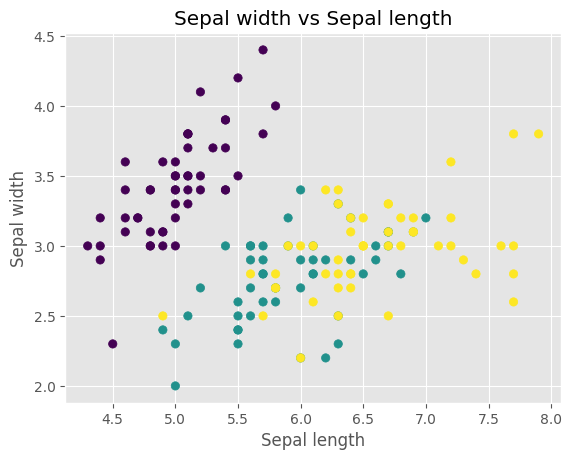

In [96]:
# Plota gráfico de disperssão dos dados com relação a classe.
# Disperssão dos dados de Sepal width e Sepal Length com as classes(0,1,2)
%matplotlib inline
from matplotlib import style
style.use("ggplot")
#sepal length vs sepal width
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.title('Sepal width vs Sepal length')
plt.scatter(treino[:,0],treino[:,1], c=classes)

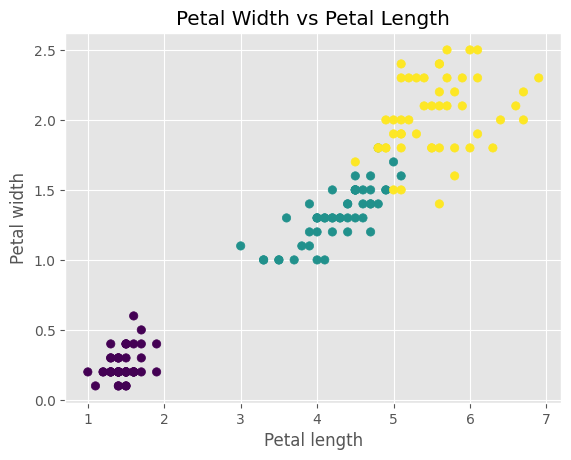

In [97]:
# Plota gráfico de disperssão dos dados com relação a classe.
# Disperssão dos dados de Petal width e Petal Length com as classes(0,1,2)
%matplotlib inline
from matplotlib import style
style.use("ggplot")
plt.xlabel('Petal length')
plt.ylabel('Petal width')
plt.title('Petal Width vs Petal Length')
plt.scatter(treino[:,2], treino[:,3], c=classes)

# Aplicando o SVM

* Agora é aplicar o SVM para classificar flores usando a base de dados Iris.

In [98]:
# Usaremos 80% dos dados para treino e 20% para teste.
# Visualizando o tamanho dos dados de treino.
len(treino[:-30]), len(classes[:-30])

(120, 120)

In [99]:
# Visualizando os dados de treino
treino[:-30]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [100]:
# Visualiando as classes correspondentes
classes[:-30]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [101]:
# Treinando o algoritmo de SVM com os dados de treino e suas respectivas classes.
clf = svm.SVC().fit(treino[:-30], classes[:-30])

In [102]:
# Objeto clf
clf

,C,1.0
,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [103]:
# Cria um array com os dados de teste
# 20% dos dados que não foram testados
teste = treino[-30:]

In [104]:
# Visualizando os dados de teste
teste

array([[6.9, 3.2, 5.7, 2.3],
       [5.6, 2.8, 4.9, 2. ],
       [7.7, 2.8, 6.7, 2. ],
       [6.3, 2.7, 4.9, 1.8],
       [6.7, 3.3, 5.7, 2.1],
       [7.2, 3.2, 6. , 1.8],
       [6.2, 2.8, 4.8, 1.8],
       [6.1, 3. , 4.9, 1.8],
       [6.4, 2.8, 5.6, 2.1],
       [7.2, 3. , 5.8, 1.6],
       [7.4, 2.8, 6.1, 1.9],
       [7.9, 3.8, 6.4, 2. ],
       [6.4, 2.8, 5.6, 2.2],
       [6.3, 2.8, 5.1, 1.5],
       [6.1, 2.6, 5.6, 1.4],
       [7.7, 3. , 6.1, 2.3],
       [6.3, 3.4, 5.6, 2.4],
       [6.4, 3.1, 5.5, 1.8],
       [6. , 3. , 4.8, 1.8],
       [6.9, 3.1, 5.4, 2.1],
       [6.7, 3.1, 5.6, 2.4],
       [6.9, 3.1, 5.1, 2.3],
       [5.8, 2.7, 5.1, 1.9],
       [6.8, 3.2, 5.9, 2.3],
       [6.7, 3.3, 5.7, 2.5],
       [6.7, 3. , 5.2, 2.3],
       [6.3, 2.5, 5. , 1.9],
       [6.5, 3. , 5.2, 2. ],
       [6.2, 3.4, 5.4, 2.3],
       [5.9, 3. , 5.1, 1.8]])

In [105]:
# Predizendo valores com a porção de dados de teste
clf.predict(teste)

array([2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       1, 2, 2, 2, 1, 2, 2, 1])

In [106]:
# Cria um array com as classes dos dados de teste.
classes_teste = classes[-30:]

In [107]:
# Visualizando as classes de teste
classes_teste

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2])

## Visualizando os Resultados de Classificação

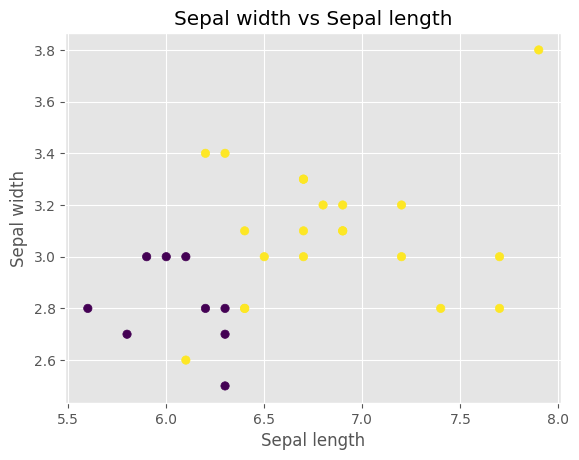

In [108]:
# Gráfico de disperssão entre as colunas Sepal Length , Sepatl width e a classe.
# Os pontos roxos são pontos no qual o classificador errou.
%matplotlib inline
from matplotlib import style
style.use("ggplot")
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.title('Sepal width vs Sepal length')
plt.scatter(treino[-30:,0],treino[-30:,1], c=clf.predict(teste))

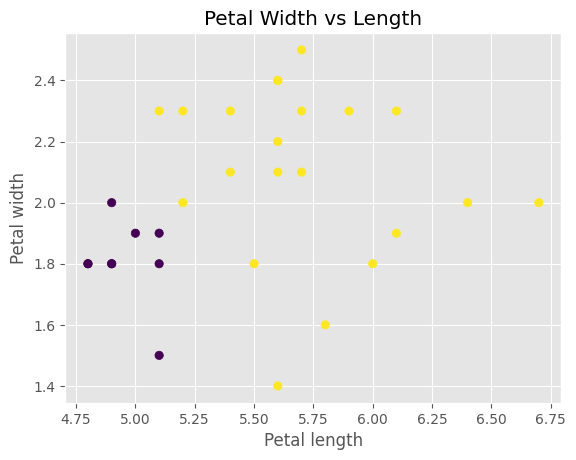

In [109]:
# Gráfico de disperssão entre as colunas Petal Length , Petal width e a classe.
# Os pontos roxos são pontos no qual o classificador errou.
%matplotlib inline
from matplotlib import style
style.use("ggplot")
plt.xlabel('Petal length')
plt.ylabel('Petal width')
plt.title('Petal Width vs Length')
plt.scatter(treino[-30:,2], treino[-30:,3], c=clf.predict(teste))

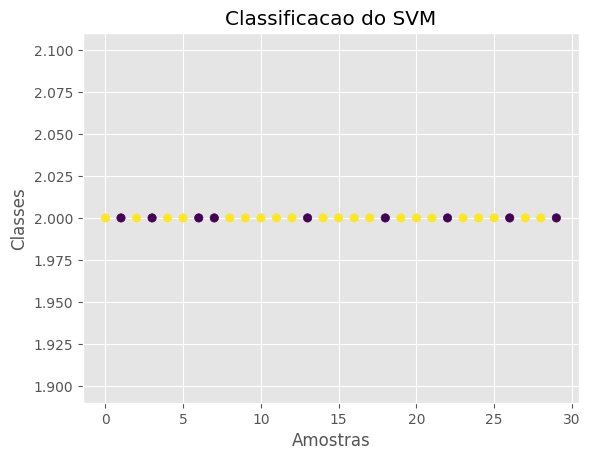

In [110]:
# Gráfico de instâncias e predição destas.
%matplotlib inline
from matplotlib import style
style.use("ggplot")
plt.xlabel('Amostras')
plt.ylabel('Classes')
plt.title('Classificacao do SVM')
plt.scatter(range(len(classes_teste)),classes_teste,c=clf.predict(teste))

# Matriz de Confusão

In [111]:
# Cria uma tabela de contingência (matriz de confusão) usando pd.crosstab.
# 'classes_teste' contém os valores reais das classes.
# 'clf.predict(teste)' contém os valores previstos pelo classificador SVM.
# 'margins=True' adiciona uma linha e uma coluna com os totais.
# O resultado é uma matriz que mostra a distribuição dos valores reais e previstos.
print(pd.crosstab(classes_teste, clf.predict(teste), rownames=['Real'], colnames=['Predito'], margins=True), '')

Predito  1   2  All
Real               
2        9  21   30
All      9  21   30 


# Cross Validation

In [112]:
# Função que retorna a acurácia após fazer uma validação cruzada (cross validation)
# A função utiliza o classificador 'clf', os dados de entrada 'X' e as classes 'y'.
# A validação cruzada é realizada com 10 folds (cv=10).
# O resultado da validação cruzada é armazenado em 'resultados'.
# A função retorna a acurácia calculada com 'metrics.accuracy_score', comparando as classes reais 'y' com as previstas 'resultados'.
def Acuracia(clf, X, y):
    resultados = cross_val_predict(clf, X, y, cv=10)
    return metrics.accuracy_score(y, resultados)

In [113]:
Acuracia(clf,treino,classes)

0.9733333333333334

# Métricas de Avaliação

In [114]:
# previsões com validação cruzada
resultados = cross_val_predict(clf, treino, classes, cv=10)

# nomes ou labels das classes
valor_classes = [0, 1, 2]

# relatório de classificação (FORMA CORRETA)
print(
    metrics.classification_report(
        classes,          # y_true
        resultados,       # y_pred
        labels=valor_classes
    )
)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.96      0.96      0.96        50
           2       0.96      0.96      0.96        50

    accuracy                           0.97       150
   macro avg       0.97      0.97      0.97       150
weighted avg       0.97      0.97      0.97       150



## Interpretação dos Resultados

- O modelo alcançou **97% de acurácia geral**, demonstrando excelente capacidade de classificação.

- A classe **Setosa (0)** foi classificada perfeitamente, com *precision*, *recall* e *F1-score* iguais a **1.00**, o que é esperado devido à sua separabilidade no espaço de características.

- As classes **Versicolor (1)** e **Virginica (2)** apresentaram **pequena confusão entre si**, refletida nos valores de *precision* e *recall* iguais a **0.96**.

- Como o conjunto de dados é **balanceado**, as métricas **macro average** e **weighted average** apresentaram valores idênticos.

---

## Conclusão

- O modelo demonstrou **alto desempenho e boa generalização**, sendo adequado para tarefas de **classificação multiclasse** no conjunto de dados Iris.  
- Os resultados indicam que o algoritmo é eficaz, especialmente na distinção da classe **Setosa**, mantendo também ótimo desempenho nas demais classes.


# Base de dados de músicas do Spotify

In [115]:
# Informações das Features da Base de dados.
# https://developer.spotify.com/web-api/get-audio-features/

In [116]:
# Carrega o dataset de músicas do Spotify a partir do arquivo 'data.csv' em um DataFrame do pandas.
# O separador de colunas é definido como vírgula (sep=',').
dataset = pd.read_csv('data.csv', sep=',')

In [117]:
dataset.head()

,id,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target,song_title,artist
0,0,0.0102,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,150.062,4.0,0.286,1,Mask Off,Future
1,1,0.1990,0.743,326933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,160.083,4.0,0.588,1,Redbone,Childish Gambino
2,2,0.0344,0.838,185707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,75.044,4.0,0.173,1,Xanny Family,Future
3,3,0.6040,0.494,199413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,86.468,4.0,0.230,1,Master Of None,Beach House
4,4,0.1800,0.678,392893,0.561,0.512000,5,0.4390,-11.648,0,0.0694,174.004,4.0,0.904,1,Parallel Lines,Junior Boys


# Análise de Dados

In [118]:
#Checando valores Missing
dataset.isnull().sum()

id                  0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
speechiness         0
tempo               0
time_signature      0
valence             0
target              0
song_title          0
artist              0
dtype: int64

In [119]:
# Resumo Estatístico da base
# Somente dados numéricos
dataset.describe()

,id,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target
count,2017.000000,2017.000000,2017.000000,2.017000e+03,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000
mean,1008.000000,0.187590,0.618422,2.463062e+05,0.681577,0.133286,5.342588,0.190844,-7.085624,0.612295,0.092664,121.603272,3.968270,0.496815,0.505702
std,582.402066,0.259989,0.161029,8.198181e+04,0.210273,0.273162,3.648240,0.155453,3.761684,0.487347,0.089931,26.685604,0.255853,0.247195,0.500091
min,0.000000,0.000003,0.122000,1.604200e+04,0.014800,0.000000,0.000000,0.018800,-33.097000,0.000000,0.023100,47.859000,1.000000,0.034800,0.000000
25%,504.000000,0.009630,0.514000,2.000150e+05,0.563000,0.000000,2.000000,0.092300,-8.394000,0.000000,0.037500,100.189000,4.000000,0.295000,0.000000
50%,1008.000000,0.063300,0.631000,2.292610e+05,0.715000,0.000076,6.000000,0.127000,-6.248000,1.000000,0.054900,121.427000,4.000000,0.492000,1.000000
75%,1512.000000,0.265000,0.738000,2.703330e+05,0.846000,0.054000,9.000000,0.247000,-4.746000,1.000000,0.108000,137.849000,4.000000,0.691000,1.000000
max,2016.000000,0.995000,0.984000,1.004627e+06,0.998000,0.976000,11.000000,0.969000,-0.307000,1.000000,0.816000,219.331000,5.000000,0.992000,1.000000


In [120]:
 # lista estilos disponíveis do Matplotlib
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'petroff10',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

<Axes: xlabel='acousticness', ylabel='danceability'>

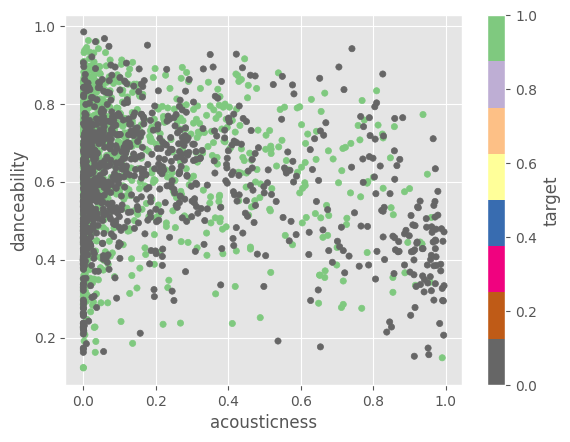

In [121]:
# Habilita a exibição de gráficos estáticos no Jupyter Notebook
%matplotlib inline

# Importa o módulo style de matplotlib para personalizar o visual dos gráficos
from matplotlib import style

# Define o estilo "ggplot" para os gráficos, que é esteticamente agradável
style.use("ggplot")

# Cria um gráfico de dispersão (scatter plot) a partir do DataFrame 'dataset'.
# 'x' define a coluna para o eixo horizontal ('acousticness' - medida de acústica da música).
# 'y' define a coluna para o eixo vertical ('danceability' - medida de quão dançável é a música).
# 'c' define a coluna usada para colorir os pontos ('target' - a classe/gênero da música).
# 'kind' especifica o tipo de gráfico como 'scatter'.
# 'colormap' define o mapa de cores a ser usado para os diferentes valores de 'target'.
dataset.plot(x='acousticness', y='danceability', c='target', kind='scatter', colormap='Accent_r')

<Axes: xlabel='tempo', ylabel='valence'>

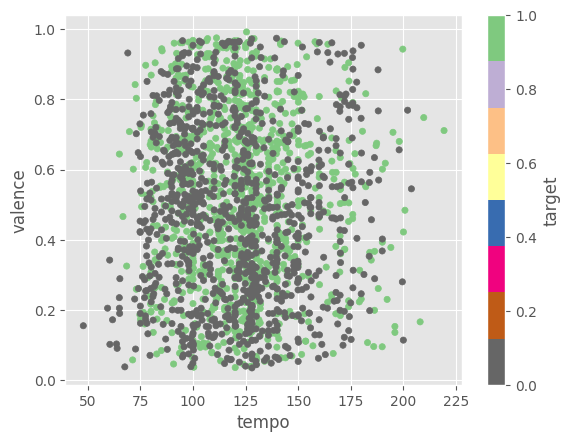

In [122]:
%matplotlib inline
# Plota outro gráfico de dispersão do dataset, desta vez com 'tempo' e 'valence'.
# 'tempo' é a batida por minuto (BPM) e 'valence' é a positividade musical.
# 'c' define a coluna 'target' para colorir os pontos, indicando a classe/gênero.
# 'Accent_r' é o mapa de cores utilizado.
dataset.plot(x='tempo', y='valence', c='target', kind='scatter' , colormap='Accent_r')

<Axes: xlabel='tempo', ylabel='speechiness'>

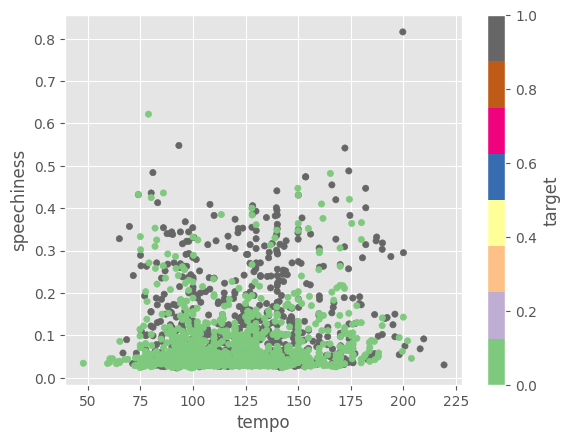

In [123]:
%matplotlib inline
# Plota outro gráfico de dispersão do dataset, desta vez com 'tempo' e 'speechiness'.
# 'tempo' é a batida por minuto (BPM) e 'speechiness' detecta a presença de palavras faladas em uma faixa.
# 'c' define a coluna 'target' para colorir os pontos, indicando a classe/gênero.
# 'Accent' é o mapa de cores utilizado.
dataset.plot(x='tempo', y='speechiness', c='target', kind='scatter' , colormap='Accent')

<Axes: xlabel='danceability', ylabel='energy'>

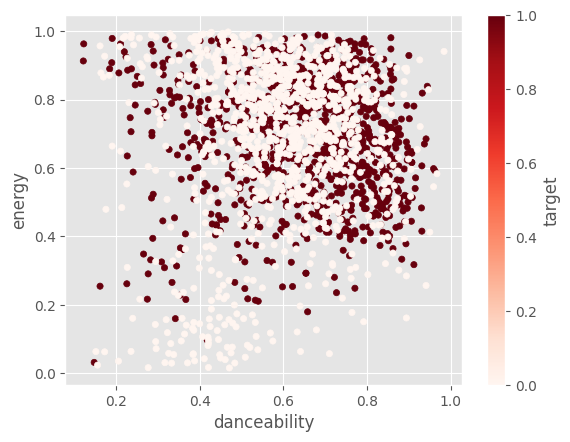

In [124]:
%matplotlib inline
from matplotlib import style
style.use("ggplot")
# Plota um gráfico de dispersão com 'danceability' no eixo X e 'energy' no eixo Y,
# colorindo os pontos de acordo com a coluna 'target' (classe/gênero da música).
# O colormap 'Reds' é usado para diferenciar as classes.
dataset.plot(x='danceability', y='energy', c='target', kind='scatter' , colormap='Reds')

# Separa a classe dos dados

In [125]:
# Separa a coluna 'target' (classe) do dataset e armazena na variável 'classes'.
classes = dataset['target']
# Remove a coluna 'target' do DataFrame 'dataset', pois ela já foi separada.
dataset.drop('target', axis=1, inplace=True)

In [126]:
dataset.head(15)

,id,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,song_title,artist
0,0,0.01020,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,150.062,4.0,0.286,Mask Off,Future
1,1,0.19900,0.743,326933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,160.083,4.0,0.588,Redbone,Childish Gambino
2,2,0.03440,0.838,185707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,75.044,4.0,0.173,Xanny Family,Future
3,3,0.60400,0.494,199413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,86.468,4.0,0.230,Master Of None,Beach House
4,4,0.18000,0.678,392893,0.561,0.512000,5,0.4390,-11.648,0,0.0694,174.004,4.0,0.904,Parallel Lines,Junior Boys
5,5,0.00479,0.804,251333,0.560,0.000000,8,0.1640,-6.682,1,0.1850,85.023,4.0,0.264,Sneakin’,Drake
6,6,0.01450,0.739,241400,0.472,0.000007,1,0.2070,-11.204,1,0.1560,80.030,4.0,0.308,Childs Play,Drake
7,7,0.02020,0.266,349667,0.348,0.664000,10,0.1600,-11.609,0,0.0371,144.154,4.0,0.393,Gyöngyhajú lány,Omega
8,8,0.04810,0.603,202853,0.944,0.000000,11,0.3420,-3.626,0,0.3470,130.035,4.0,0.398,I've Seen Footage,Death Grips
9,9,0.00208,0.836,226840,0.603,0.000000,7,0.5710,-7.792,1,0.2370,99.994,4.0,0.386,Digital Animal,Honey Claws


# Pre-processamento de dados

In [127]:
# Define uma função para remover múltiplas features (colunas) de um DataFrame.
# A função recebe uma lista de nomes de features a serem removidas.
def remove_features(lista_features):
    # Itera sobre cada feature na lista fornecida.
    for i in lista_features:
        # Remove a coluna 'i' do DataFrame 'dataset'.
        # 'axis=1' especifica que estamos removendo uma coluna.
        # 'inplace=True' modifica o DataFrame 'dataset' diretamente, sem retornar uma nova cópia.
        dataset.drop(i, axis=1, inplace=True)
    # Retorna 0 após a execução (pode ser usado para indicar sucesso).
    return 0

In [128]:
# Remove features
remove_features(['id','song_title'])

0

In [129]:
# Visualizando o dataset
dataset.artist.head(10)

0              Future
1    Childish Gambino
2              Future
3         Beach House
4         Junior Boys
5               Drake
6               Drake
7               Omega
8         Death Grips
9         Honey Claws
Name: artist, dtype: object

In [130]:
# Visualizando o dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2017 entries, 0 to 2016
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   acousticness      2017 non-null   float64
 1   danceability      2017 non-null   float64
 2   duration_ms       2017 non-null   int64  
 3   energy            2017 non-null   float64
 4   instrumentalness  2017 non-null   float64
 5   key               2017 non-null   int64  
 6   liveness          2017 non-null   float64
 7   loudness          2017 non-null   float64
 8   mode              2017 non-null   int64  
 9   speechiness       2017 non-null   float64
 10  tempo             2017 non-null   float64
 11  time_signature    2017 non-null   float64
 12  valence           2017 non-null   float64
 13  artist            2017 non-null   object 
dtypes: float64(10), int64(3), object(1)
memory usage: 220.7+ KB


# Label Encoder

* Técnica para codificar valores categoricos em numéricos
* Um exemplo seria: a lista de cores: _(‘branco’,’preto’,’amarelo’,’vermelho’,'branco')_
* Após aplicar o LabelEncoder esta seria algo como __(1,2,3,4,1)__

In [131]:
# Importa o LabelEncoder para converter rótulos categóricos em valores numéricos.
from sklearn.preprocessing import LabelEncoder

In [132]:
enc = LabelEncoder()

In [133]:
# Aplica o LabelEncoder na coluna 'artist' do DataFrame 'dataset'.
# Isso converte os nomes dos artistas (strings) em valores numéricos inteiros.
# O resultado (array de inteiros) é armazenado na variável 'inteiros'.
inteiros = enc.fit_transform(dataset['artist'])

In [134]:
# Visualizando valores únicos.
set(inteiros)

{np.int64(0),
 np.int64(1),
 np.int64(2),
 np.int64(3),
 np.int64(4),
 np.int64(5),
 np.int64(6),
 np.int64(7),
 np.int64(8),
 np.int64(9),
 np.int64(10),
 np.int64(11),
 np.int64(12),
 np.int64(13),
 np.int64(14),
 np.int64(15),
 np.int64(16),
 np.int64(17),
 np.int64(18),
 np.int64(19),
 np.int64(20),
 np.int64(21),
 np.int64(22),
 np.int64(23),
 np.int64(24),
 np.int64(25),
 np.int64(26),
 np.int64(27),
 np.int64(28),
 np.int64(29),
 np.int64(30),
 np.int64(31),
 np.int64(32),
 np.int64(33),
 np.int64(34),
 np.int64(35),
 np.int64(36),
 np.int64(37),
 np.int64(38),
 np.int64(39),
 np.int64(40),
 np.int64(41),
 np.int64(42),
 np.int64(43),
 np.int64(44),
 np.int64(45),
 np.int64(46),
 np.int64(47),
 np.int64(48),
 np.int64(49),
 np.int64(50),
 np.int64(51),
 np.int64(52),
 np.int64(53),
 np.int64(54),
 np.int64(55),
 np.int64(56),
 np.int64(57),
 np.int64(58),
 np.int64(59),
 np.int64(60),
 np.int64(61),
 np.int64(62),
 np.int64(63),
 np.int64(64),
 np.int64(65),
 np.int64(66),
 np.i

In [135]:
# Cria uma nova coluna chamada 'artist_inteiros'
dataset['artist_inteiros'] = inteiros

In [136]:
dataset.head()

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,artist,artist_inteiros
0,0.0102,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,150.062,4.0,0.286,Future,449
1,0.1990,0.743,326933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,160.083,4.0,0.588,Childish Gambino,222
2,0.0344,0.838,185707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,75.044,4.0,0.173,Future,449
3,0.6040,0.494,199413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,86.468,4.0,0.230,Beach House,95
4,0.1800,0.678,392893,0.561,0.512000,5,0.4390,-11.648,0,0.0694,174.004,4.0,0.904,Junior Boys,628


In [137]:
# Visualizando o Dataset alterado.
dataset.head(20)

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,artist,artist_inteiros
0,0.01020,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,150.062,4.0,0.286,Future,449
1,0.19900,0.743,326933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,160.083,4.0,0.588,Childish Gambino,222
2,0.03440,0.838,185707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,75.044,4.0,0.173,Future,449
3,0.60400,0.494,199413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,86.468,4.0,0.230,Beach House,95
4,0.18000,0.678,392893,0.561,0.512000,5,0.4390,-11.648,0,0.0694,174.004,4.0,0.904,Junior Boys,628
5,0.00479,0.804,251333,0.560,0.000000,8,0.1640,-6.682,1,0.1850,85.023,4.0,0.264,Drake,356
6,0.01450,0.739,241400,0.472,0.000007,1,0.2070,-11.204,1,0.1560,80.030,4.0,0.308,Drake,356
7,0.02020,0.266,349667,0.348,0.664000,10,0.1600,-11.609,0,0.0371,144.154,4.0,0.393,Omega,869
8,0.04810,0.603,202853,0.944,0.000000,11,0.3420,-3.626,0,0.3470,130.035,4.0,0.398,Death Grips,321
9,0.00208,0.836,226840,0.603,0.000000,7,0.5710,-7.792,1,0.2370,99.994,4.0,0.386,Honey Claws,516


# One Hot Encoding

* Técnica usada para codificar valores categóricos em númericos.
* Cria uma matriz de presença.
* Resolve o problema __ordenação__ nos dados gerados pelo LabelEncoder.

In [138]:
# Apaque a coluna 'Artist'
remove_features(['artist'])


0

In [139]:
# Importa o pacote OneHotEncoder
from sklearn.preprocessing import OneHotEncoder

In [140]:
# Instancia um objeto do tipo OnehotEncoder
ohe = OneHotEncoder()

In [141]:
dataset.values

array([[1.02000e-02, 8.33000e-01, 2.04600e+05, ..., 4.00000e+00,
        2.86000e-01, 4.49000e+02],
       [1.99000e-01, 7.43000e-01, 3.26933e+05, ..., 4.00000e+00,
        5.88000e-01, 2.22000e+02],
       [3.44000e-02, 8.38000e-01, 1.85707e+05, ..., 4.00000e+00,
        1.73000e-01, 4.49000e+02],
       ...,
       [8.57000e-03, 6.37000e-01, 2.07200e+05, ..., 4.00000e+00,
        4.70000e-01, 9.47000e+02],
       [1.64000e-03, 5.57000e-01, 1.85600e+05, ..., 4.00000e+00,
        6.23000e-01, 1.24200e+03],
       [2.81000e-03, 4.46000e-01, 2.04520e+05, ..., 4.00000e+00,
        4.02000e-01, 1.32000e+02]], shape=(2017, 14))

In [142]:
# Transforma em arrayn numpy o dataset.
dataset_array = dataset.values

In [143]:
# Pega o numero de linhas.
num_rows = dataset_array.shape[0]

In [144]:
# Visualiza coluna de inteiros
dataset_array[:][:,13]


array([ 449.,  222.,  449., ...,  947., 1242.,  132.], shape=(2017,))

In [145]:
# Transforma a matriz em uma dimensão
inteiros = inteiros.reshape(len(inteiros),1)

In [146]:
# Criar as novas features a partir da matriz de presença
novas_features = ohe.fit_transform(inteiros)

In [147]:
# Imprime as novas features
novas_features

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 2017 stored elements and shape (2017, 1343)>

In [148]:
# Concatena as novas features ao array
dataset_array = np.concatenate([dataset_array, novas_features.toarray()], axis=1)

In [149]:
# Visualizando a quantidade de linhas e colunas da base
dataset_array.shape

(2017, 1357)

In [150]:
# Transforma em dataframe e visualiza as colunas
dataf = pd.DataFrame(dataset_array)

In [151]:
dataf.head(100)

,0,1,2,3,4,5,6,7,8,9,...,1347,1348,1349,1350,1351,1352,1353,1354,1355,1356
0,0.0102,0.833,204600.0,0.434,0.021900,2.0,0.1650,-8.795,1.0,0.4310,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.1990,0.743,326933.0,0.359,0.006110,1.0,0.1370,-10.401,1.0,0.0794,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0344,0.838,185707.0,0.412,0.000234,2.0,0.1590,-7.148,1.0,0.2890,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.6040,0.494,199413.0,0.338,0.510000,5.0,0.0922,-15.236,1.0,0.0261,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.1800,0.678,392893.0,0.561,0.512000,5.0,0.4390,-11.648,0.0,0.0694,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.1700,0.615,214150.0,0.814,0.000000,9.0,0.2180,-3.903,0.0,0.0677,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
96,0.0604,0.799,333520.0,0.789,0.000000,0.0,0.0338,-8.208,1.0,0.0396,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
97,0.0571,0.398,247390.0,0.776,0.017200,9.0,0.3030,-7.388,0.0,0.0374,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
98,0.7160,0.685,427227.0,0.423,0.518000,11.0,0.0765,-9.031,0.0,0.0475,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Pandas Get_dummies

* Cria uma matriz de presença como feito com o OHE.

In [152]:
dataset.head()

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,artist_inteiros
0,0.0102,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,150.062,4.0,0.286,449
1,0.1990,0.743,326933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,160.083,4.0,0.588,222
2,0.0344,0.838,185707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,75.044,4.0,0.173,449
3,0.6040,0.494,199413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,86.468,4.0,0.230,95
4,0.1800,0.678,392893,0.561,0.512000,5,0.4390,-11.648,0,0.0694,174.004,4.0,0.904,628


In [153]:
# Aplica a função get_dummies do pandas para realizar One-Hot Encoding na coluna 'artist_inteiros'.
# Isso converte a coluna numérica de artistas em múltiplas colunas binárias (0 ou 1),
# onde cada nova coluna representa um artista único.
# 'columns=['artist_inteiros']' especifica a coluna a ser transformada.
# 'prefix='artist'' adiciona o prefixo 'artist' às novas colunas geradas, por exemplo, 'artist_0', 'artist_1', etc.
dataset = pd.get_dummies(dataset, columns=['artist_inteiros'], prefix='artist')

In [154]:
# Visualizando 'features' geradas.
dataset.columns

Index(['acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
       'speechiness',
       ...
       'artist_1333', 'artist_1334', 'artist_1335', 'artist_1336',
       'artist_1337', 'artist_1338', 'artist_1339', 'artist_1340',
       'artist_1341', 'artist_1342'],
      dtype='object', length=1356)

In [155]:
len(dataset.columns)

1356

In [156]:
# Visualizando as colunas
dataset.dtypes

acousticness        float64
danceability        float64
duration_ms           int64
energy              float64
instrumentalness    float64
                     ...   
artist_1338            bool
artist_1339            bool
artist_1340            bool
artist_1341            bool
artist_1342            bool
Length: 1356, dtype: object

In [157]:
# checando missing values
dataset.isnull().sum()

acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
                   ..
artist_1338         0
artist_1339         0
artist_1340         0
artist_1341         0
artist_1342         0
Length: 1356, dtype: int64

In [158]:
# coluna artist
len(dataset.columns)

1356

# Pipeline

In [159]:
# Importa a classe Pipeline para construir sequências de transformações e estimadores.
from sklearn.pipeline import Pipeline
# Importa o StandardScaler para padronizar features (removendo a média e escalando para a variância unitária).
from sklearn.preprocessing import StandardScaler
# Importa o MinMaxScaler para escalar features para um intervalo específico (geralmente entre 0 e 1).
from sklearn.preprocessing import MinMaxScaler
# Importa a classe Pipeline para construir sequências de transformações e estimadores.

In [160]:
# Treinando o algoritmo de SVM.
clf = svm.SVC().fit(dataset,classes)

In [161]:
clf

,C,1.0
,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [ ]:
# Calcula a acurácia do classificador SVM (clf) no dataset de músicas, utilizando a função Acuracia
# que realiza validação cruzada para avaliar o desempenho do modelo.
Acuracia(clf,dataset,classes)

0.5577590480912246

In [163]:
# Criando um pipeline
pip_1 = Pipeline([
    ('scaler',StandardScaler()),
    ('clf', svm.SVC())
])

In [164]:
# Imprimindo Etapas do Pipeline
pip_1.steps

[('scaler', StandardScaler()), ('clf', SVC())]

In [165]:
# Chama a função acuracia passando os dados de musicas e as classes
# Usando o pipeline pip_1
Acuracia(pip_1,dataset,classes)

0.58601883986118

In [ ]:
# Criando vários Pipelines
# Criando um pipeline com MinMaxScaler para normalizar os dados entre 0 e 1,
# seguido por um classificador SVM com os parâmetros padrão.
pip_2 = Pipeline([
    ('min_max_scaler', MinMaxScaler()),
    ('clf', svm.SVC())
])

# Criando um pipeline com StandardScaler para padronizar os dados,
# seguido por um classificador SVM com kernel radial basis function (RBF).
pip_3 = Pipeline([
    ('scaler',StandardScaler()),
    ('clf', svm.SVC(kernel='rbf'))
])

# Criando um pipeline com StandardScaler para padronizar os dados,
# seguido por um classificador SVM com kernel polinomial.
pip_4 = Pipeline([
    ('scaler',StandardScaler()),
    ('clf', svm.SVC(kernel='poly'))
])

# Criando um pipeline com StandardScaler para padronizar os dados,
# seguido por um classificador SVM com kernel linear.
pip_5 = Pipeline([
    ('scaler',StandardScaler()),
    ('clf', svm.SVC(kernel='linear'))
])

In [168]:
# Chama a função acuracia passando os dados de musicas e as classes
# Usando o pipeline pip_2
Acuracia(pip_2,dataset,classes)

0.7223599405057015

# Teste com apenas labelEncoder nos dados

In [169]:
# Teste com apenas LabelEncoder na coluna 'artist' usando o pipeline 'pip_1'
Acuracia(pip_1,dataset,classes)

0.58601883986118

In [170]:
# # Teste com apenas LabelEncoder na coluna 'artist' usando o pipeline 'pip_1'
Acuracia(pip_2,dataset,classes)

0.7223599405057015

# Testando o Desempenho dos Kernels

In [171]:
# Testando o Kernel RBF
Acuracia(pip_3,dataset,classes)

0.58601883986118

In [172]:
# Testando o Kernel Poly
Acuracia(pip_4,dataset,classes)

0.5751115518096183

In [173]:
# Teste de Kernel linear
Acuracia(pip_5,dataset,classes)

0.6058502726822013

## Teste de Overfitting

In [174]:
# Importa a função train_test_split para dividir dados em conjuntos de treino e teste.
from sklearn.model_selection import train_test_split
# Divide o 'dataset' (features) e 'classes' (rótulos) em conjuntos de treino e teste.
# - 'test_size=0.2' indica que 20% dos dados serão usados para o conjunto de teste.
# - 'random_state=123' garante que a divisão seja a mesma cada vez que o código for executado,
#   tornando os resultados reproduzíveis.
X_train, X_test, y_train, y_test = train_test_split(dataset, classes, test_size=0.2, random_state=123)

In [175]:
# Instancia e ajusta (fit) um StandardScaler aos dados de treino (X_train).
# Em seguida, transforma (transform) X_train usando este scaler, padronizando os dados.
# Este é o processo correto para escalar o conjunto de treino.
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
# Instancia e ajusta (fit) um NOVO StandardScaler aos dados de teste (X_test).
# Em seguida, transforma (transform) X_test usando este NOVO scaler.
# IMPORTANTE: Esta abordagem pode levar a "data leakage" (vazamento de dados),
# pois o scaler do teste aprende estatísticas (média e desvio padrão) diretamente do conjunto de teste.
# A prática recomendada é usar o MESMO scaler (scaler ajustado em X_train)
# para transformar X_test, como em: X_test = scaler.transform(X_test).
scaler2 = StandardScaler().fit(X_test)
X_test = scaler2.transform(X_test)

In [176]:
# Treina o algoritmo
clf.fit(X_train, y_train)

,C,1.0
,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [177]:
# Resultados de predição.
y_pred  = clf.predict(X_test)

In [178]:
# Imprime a acurácia.
metrics.accuracy_score(y_test,y_pred)

0.6732673267326733

In [179]:
# Testando a classificação com o próprio teste

In [180]:
# Resultados de predição
y_pred  = clf.predict(X_train)

In [181]:
# Imprime a Acurácia.
metrics.accuracy_score(y_train,y_pred)

0.9851208927464352


# Tunning

In [182]:
# Importa o utilitário GridSearchCV
from sklearn.model_selection import GridSearchCV

In [183]:
# Lista de Valores de C
lista_C = [0.001, 0.01, 0.1, 1, 10, 100]

# Lista de Valores de gamma
lista_gamma = [0.001, 0.01, 0.1, 1, 10, 100]

In [184]:
# Define um dicionário que recebe as listas de parâmetros e valores.
parametros_grid = dict(clf__C=lista_C, clf__gamma=lista_gamma)

In [185]:
parametros_grid

{'clf__C': [0.001, 0.01, 0.1, 1, 10, 100],
 'clf__gamma': [0.001, 0.01, 0.1, 1, 10, 100]}

In [ ]:
# Cria um objeto GridSearchCV para realizar a busca em grade (grid search) com validação cruzada.
# O pipeline 'pip_3' é usado como modelo base, que inclui o pré-processamento e o classificador SVM.
# 'parametros_grid' é o dicionário que contém os valores de hiperparâmetros (C e gamma) a serem testados.
# 'cv=10' especifica que a validação cruzada será feita com 10 folds.
# 'scoring='accuracy'' define que a métrica de avaliação será a acurácia.
grid = GridSearchCV(pip_3, parametros_grid, cv=10, scoring='accuracy')

In [ ]:
# Aplica o gridsearch passando os dados de treino e classes.
# Aplica o gridsearch passando os dados de treino e classes.
# Este comando executa a busca exaustiva sobre os parâmetros definidos em 'parametros_grid'
# para o pipeline 'pip_3', utilizando validação cruzada (cv=10) no 'dataset' (features)
# e 'classes' (rótulos de destino) para encontrar a melhor combinação de hiperparâmetros (C e gamma)
# que maximiza a acurácia.
grid.fit(dataset,classes)

,estimator,"Pipeline(step...clf', SVC())])"
,param_grid,"{'clf__C': [0.001, 0.01, ...], 'clf__gamma': [0.001, 0.01, ...]}"
,scoring,'accuracy'
,n_jobs,None
,refit,True
,cv,10
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,copy,True


# Resultados de Grid

In [ ]:
# Converte os resultados da validação cruzada do GridSearchCV em um DataFrame do pandas.
# 'grid.cv_results_' é um dicionário que contém informações detalhadas sobre cada combinação de parâmetros testada.
resultados = pd.DataFrame(grid.cv_results_)

# Seleciona e exibe as colunas relevantes do DataFrame 'resultados':
# 'params': Dicionário dos parâmetros usados para uma execução específica.
# 'mean_test_score': A pontuação média de acurácia obtida nos folds da validação cruzada.
# 'std_test_score': O desvio padrão da pontuação de acurácia nos folds da validação cruzada,
#                   indicando a consistência do desempenho para aquela combinação de parâmetros.
resultados[['params', 'mean_test_score', 'std_test_score']]

,params,mean_test_score,std_test_score
0,"{'clf__C': 0.001, 'clf__gamma': 0.001}",0.505704,0.001151
1,"{'clf__C': 0.001, 'clf__gamma': 0.01}",0.505704,0.001151
2,"{'clf__C': 0.001, 'clf__gamma': 0.1}",0.505704,0.001151
3,"{'clf__C': 0.001, 'clf__gamma': 1}",0.505704,0.001151
4,"{'clf__C': 0.001, 'clf__gamma': 10}",0.505704,0.001151
5,"{'clf__C': 0.001, 'clf__gamma': 100}",0.505704,0.001151
6,"{'clf__C': 0.01, 'clf__gamma': 0.001}",0.505704,0.001151
7,"{'clf__C': 0.01, 'clf__gamma': 0.01}",0.505704,0.001151
8,"{'clf__C': 0.01, 'clf__gamma': 0.1}",0.505704,0.001151
9,"{'clf__C': 0.01, 'clf__gamma': 1}",0.505704,0.001151


In [ ]:
# Ordena os resultados da validação cruzada pela coluna 'mean_test_score' em ordem decrescente.
# Isso permite visualizar os melhores modelos (combinações de hiperparâmetros) no topo.
resultados.sort_values(by='mean_test_score', ascending=False)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_clf__C,param_clf__gamma,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
25,3.303771,0.101976,0.498093,0.022428,10.000,0.010,"{'clf__C': 10, 'clf__gamma': 0.01}",0.673267,0.668317,0.747525,0.608911,0.613861,0.732673,0.633663,0.626866,0.592040,0.572139,0.646926,0.055088,1
30,3.106083,0.058357,0.376515,0.014502,100.000,0.001,"{'clf__C': 100, 'clf__gamma': 0.001}",0.613861,0.702970,0.663366,0.613861,0.623762,0.564356,0.732673,0.696517,0.636816,0.601990,0.645017,0.049849,2
19,3.257620,0.054668,0.485321,0.018051,1.000,0.010,"{'clf__C': 1, 'clf__gamma': 0.01}",0.797030,0.702970,0.589109,0.544554,0.623762,0.727723,0.618812,0.641791,0.592040,0.601990,0.643978,0.072333,3
32,3.290170,0.046885,0.504966,0.013241,100.000,0.100,"{'clf__C': 100, 'clf__gamma': 0.1}",0.539604,0.707921,0.500000,0.683168,0.663366,0.524752,0.683168,0.691542,0.661692,0.661692,0.631691,0.073996,4
26,3.295273,0.126165,0.591466,0.220653,10.000,0.100,"{'clf__C': 10, 'clf__gamma': 0.1}",0.539604,0.707921,0.500000,0.683168,0.663366,0.524752,0.683168,0.691542,0.661692,0.661692,0.631691,0.073996,4
20,3.309485,0.072793,0.504321,0.016151,1.000,0.100,"{'clf__C': 1, 'clf__gamma': 0.1}",0.544554,0.698020,0.495050,0.683168,0.663366,0.524752,0.683168,0.686567,0.661692,0.666667,0.630700,0.073162,6
31,3.272464,0.041019,0.473230,0.007357,100.000,0.010,"{'clf__C': 100, 'clf__gamma': 0.01}",0.623762,0.618812,0.693069,0.594059,0.613861,0.747525,0.599010,0.616915,0.562189,0.552239,0.622144,0.055377,7
24,3.352848,0.212733,0.401714,0.012652,10.000,0.001,"{'clf__C': 10, 'clf__gamma': 0.001}",0.554455,0.638614,0.495050,0.544554,0.623762,0.529703,0.638614,0.646766,0.592040,0.601990,0.586555,0.050098,8
18,3.059933,0.094156,0.466485,0.018991,1.000,0.001,"{'clf__C': 1, 'clf__gamma': 0.001}",0.554455,0.633663,0.495050,0.544554,0.623762,0.529703,0.638614,0.646766,0.592040,0.597015,0.585562,0.049466,9
33,3.399219,0.039961,0.528297,0.013673,100.000,1.000,"{'clf__C': 100, 'clf__gamma': 1}",0.509901,0.549505,0.504950,0.504950,0.519802,0.504950,0.524752,0.552239,0.522388,0.537313,0.523075,0.017102,10


In [199]:
# Exibe os melhores parâmetros encontrados pelo GridSearchCV (combinação de C e gamma).
grid.best_params_
# Exibe a melhor pontuação (acurácia) obtida com os melhores parâmetros.
grid.best_score_

np.float64(0.6469262597901582)

In [193]:
# Imprime os melhores parâmetros
grid.best_params_

{'clf__C': 10, 'clf__gamma': 0.01}

In [198]:
# Cria uma tabela dinâmica (pivot table) a partir do DataFrame 'resultados'.
tabela = resultados.pivot_table(
    values='mean_test_score', # Os valores na tabela serão as pontuações médias de teste ('mean_test_score').
    index='C',               # A coluna 'C' será usada como índice (linhas) da tabela.
    columns='gamma'          # A coluna 'gamma' será usada como colunas da tabela.
)

# Exibe a tabela dinâmica resultante.
tabela

gamma,0.001,0.010,0.100,1.000,10.000,100.000
C,,,,,,
0.001,0.505704,0.505704,0.505704,0.505704,0.505704,0.505704
0.010,0.505704,0.505704,0.505704,0.505704,0.505704,0.505704
0.100,0.476917,0.509184,0.505704,0.505704,0.505704,0.505704
1.000,0.585562,0.643978,0.630700,0.521093,0.508182,0.506197
10.000,0.586555,0.646926,0.631691,0.523075,0.508182,0.506197
100.000,0.645017,0.622144,0.631691,0.523075,0.508182,0.506197


Conclusão

- Neste projeto, foi desenvolvido um classificador de preferências musicais utilizando o algoritmo Support Vector Machine (SVM), com o objetivo de prever se um usuário irá gostar ou não de uma música a partir de características extraídas dos dados.

- Durante o desenvolvimento, foi aplicado GridSearchCV para otimização dos hiperparâmetros do modelo, permitindo avaliar diversas combinações de valores para C e gamma. Os resultados mostraram que valores baixos desses hiperparâmetros apresentaram melhor desempenho médio, indicando que um modelo com fronteira de decisão mais suave generaliza melhor o padrão de preferências do usuário, evitando overfitting em dados ruidosos.

- A utilização de validação cruzada garantiu uma avaliação mais robusta do modelo, reduzindo a dependência de uma única divisão dos dados. Além disso, a padronização das features contribuiu para um melhor funcionamento do SVM, uma vez que o algoritmo é sensível à escala dos dados.

- Com base nos resultados obtidos, conclui-se que o SVM é uma abordagem eficaz para sistemas de recomendação musical, sendo capaz de capturar padrões relevantes nas preferências do usuário. O modelo final apresenta um bom equilíbrio entre desempenho e capacidade de generalização, podendo ser expandido futuramente com novos atributos, mais dados de usuários ou integração com sistemas de recomendação mais complexos.